Importing all required libraries

In [1]:
import pandas as pd, numpy as np, plotly.express as px, random, matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import LocallyLinearEmbedding, TSNE
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [2]:
def loadDataset(filepath):
  data = []
  labels = []
  with open(filepath) as file:
    for line in file:
      aux = []
      for x in line.split():
        aux.append(np.uint8(x))
      labels.append(aux.pop())
      data.append(aux)
  return np.array(data), np.array(labels)

Loading Train Dataset

In [4]:
train_data, train_labels = loadDataset("./mnist_train_3_4_5_9.txt");
train_data.shape

(19450, 784)

Loading Validation Dataset

In [3]:
validation_data, validation_labels = loadDataset("./mnist_validation_3_4_5_9.txt");
validation_data.shape

(3893, 784)

# Dimension Reduction to 3D

## 1. PCA

In [5]:
pca = PCA(n_components=3)
pca_train_data = pca.fit_transform(train_data)
pca_validation_data = pca.fit_transform(validation_data)

## 2. PCA with Kernel

In [6]:
kernelpca = KernelPCA(n_components=3, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
kernelpca_train_data = kernelpca.fit_transform(train_data)
kernelpca_validation_data = kernelpca.fit_transform(validation_data)

## 3. LLE

In [7]:
lle_train_data = LocallyLinearEmbedding(n_components=3, n_neighbors=10).fit_transform(train_data)
lle_validation_data = LocallyLinearEmbedding(n_components=3, n_neighbors=10).fit_transform(validation_data)

## 4. t-SNE

In [8]:
tsne_train_data = TSNE(n_components=3, random_state=0).fit_transform(train_data)
tsne_validation_data = TSNE(n_components=3, random_state=0).fit_transform(validation_data)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


# 3D Scatterplots of Digits

In [9]:
def drawScatterplot(data, labels):
  x = []
  y = []
  z = []
  for i in data:
    x.append(i[0])
    y.append(i[1])
    z.append(i[2])
  px.scatter_3d(x=x, y=y, z=z, color=labels).show()

## 1. PCA

In [10]:
drawScatterplot(pca_train_data, train_labels)

## 2. PCA with Kernel

In [11]:
drawScatterplot(kernelpca_train_data, train_labels)

## 3. LLE

In [12]:
drawScatterplot(lle_train_data, train_labels)

## 4. t-SNE

In [13]:
drawScatterplot(tsne_train_data, train_labels)

Variance Preserved in PCA Transformations

In [14]:
pca.explained_variance_ratio_

array([0.12679147, 0.08252777, 0.05607866])

# Reverse Transform 16 Digits Randomly and Visualize Both Original and Reconstructed Digits

In [15]:
train_data_random = []
labels_random = []
indices = random.sample(range(0, len(train_data)-1), 16)
for i in indices:
  train_data_random.append(train_data[i])
  labels_random.append(train_labels[i])

In [16]:
def fun(data):
  aux = []
  for i in indices:
    aux.append(data[i])
  return np.array(aux)

In [17]:
def drawMatplot(data):
  fig, axes = plt.subplots(4, 4, figsize=(10, 10))
  for i in range(16):
    a = data[i].reshape(28, 28)
    ax = axes[i//4, i%4]
    ax.imshow(a, cmap='gray')
    ax.set_title('Label: {}'.format(labels_random[i]))
  plt.tight_layout()
  plt.show()

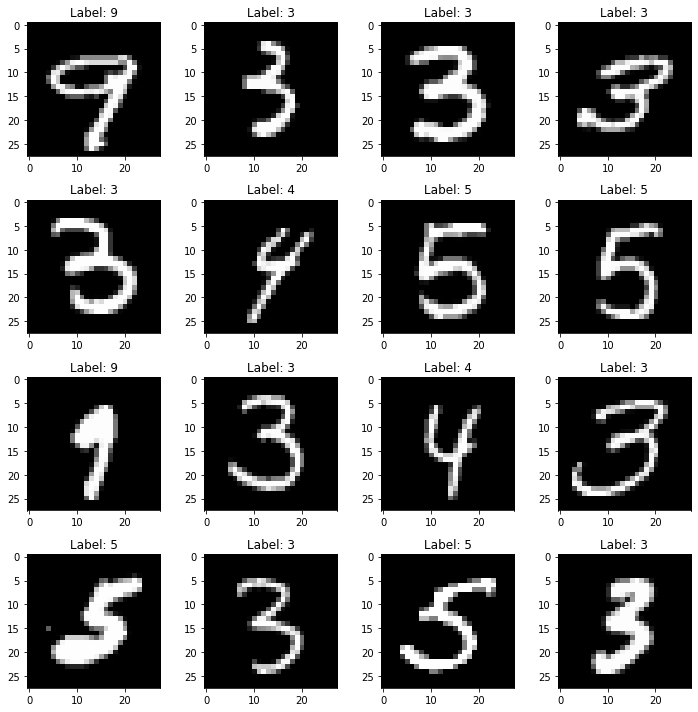

In [18]:
drawMatplot(train_data_random)

## 1. PCA

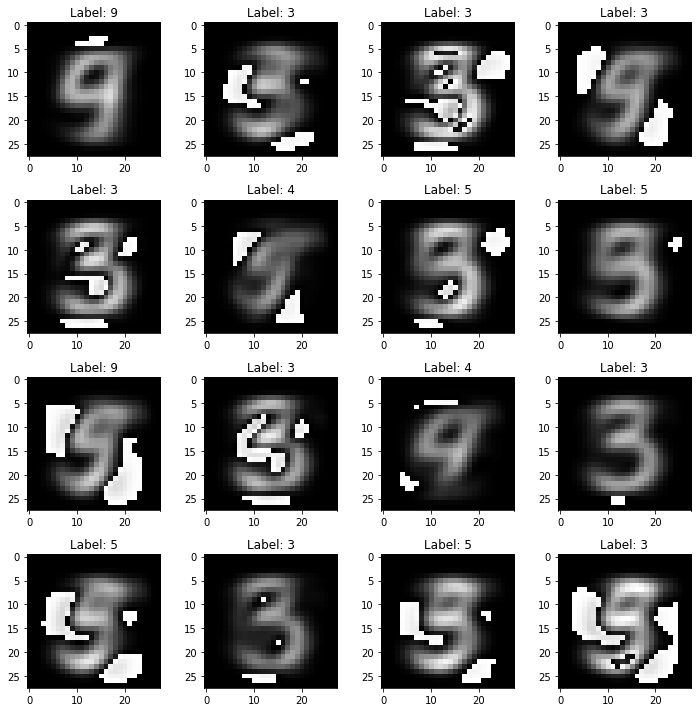

In [19]:
drawMatplot(pca.inverse_transform(fun(pca_train_data)).astype('uint8'))

## 2. PCA with Kernel

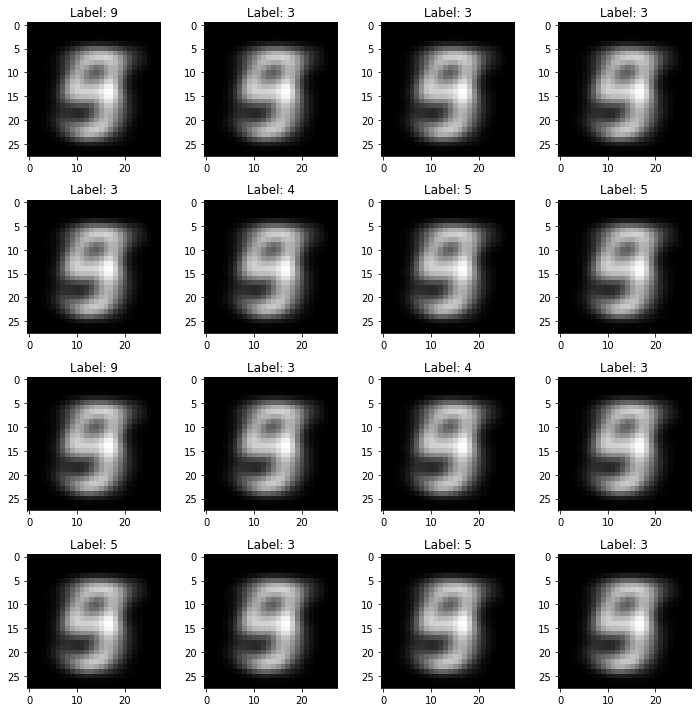

In [20]:
drawMatplot(kernelpca.inverse_transform(fun(kernelpca_train_data)).astype('uint8'))

# Classification on 3D Dataset

## 1. Logistic Regression

In [21]:
def fun2(train_data, train_labels, validation_data, validation_labels, max_iter):
  clf = LogisticRegression(random_state=0, max_iter=max_iter).fit(train_data, train_labels)
  print("Training Accuracy: ", clf.score(train_data, train_labels))
  print("Validation Accuracy: ", clf.score(validation_data, validation_labels))

### 1. PCA

In [22]:
fun2(pca_train_data, train_labels, pca_validation_data, validation_labels, 600)

Training Accuracy:  0.6185089974293059
Validation Accuracy:  0.6146930387875674


### 2. PCA with Kernel

In [23]:
fun2(kernelpca_train_data, train_labels, kernelpca_validation_data, validation_labels, 400)

Training Accuracy:  0.25974293059125964
Validation Accuracy:  0.27742101207295145


### 3. LLE

In [24]:
fun2(lle_train_data, train_labels, lle_validation_data, validation_labels, 400)

Training Accuracy:  0.6413881748071979
Validation Accuracy:  0.6321602876958644


### 4. t-SNE

In [25]:
fun2(tsne_train_data, train_labels, tsne_validation_data, validation_labels, 400)

Training Accuracy:  0.9673007712082262
Validation Accuracy:  0.6241972771641408


## 2. SVM

In [26]:
def fun3(train_data, train_labels, validation_data, validation_labels, clf):
  clf.fit(train_data, train_labels)
  print("Training Accuracy: ", clf.score(train_data, train_labels))
  print("Validation Accuracy: ", clf.score(validation_data, validation_labels))

### 1. PCA

In [27]:
clf = svm.SVC(kernel='rbf', max_iter = 10000, gamma = 0.001)
fun3(pca_train_data, train_labels, pca_validation_data, validation_labels, clf)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning:

Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



Training Accuracy:  0.9760411311053985
Validation Accuracy:  0.5450809144618546


### 2. PCA with Kernel

In [28]:
clf = svm.SVC(kernel='linear')
fun3(kernelpca_train_data, train_labels, kernelpca_validation_data, validation_labels, clf)

Training Accuracy:  0.2595372750642673
Validation Accuracy:  0.27819162599537633


### 3. LLE

In [29]:
fun3(lle_train_data, train_labels, lle_validation_data, validation_labels, clf)

Training Accuracy:  0.5726992287917738
Validation Accuracy:  0.6198304649370665


### 4. t-SNE

In [30]:
fun3(tsne_train_data, train_labels, tsne_validation_data, validation_labels, clf)

Training Accuracy:  0.9714652956298201
Validation Accuracy:  0.6182892370922168
